# Figure 2 Decay as a function of N

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../../outputs/fig2a_2000sim_summary.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,1.971884,1.828793,3.926775,1.046293,192,48,4,50,30.0,0.0,0.0,G,NaN,False
1,0,9.865727,9.107844,19.559731,5.268751,6,2,3,50,30.0,0.0,0.0,G,NaN,False
2,0,1.783237,1.660521,3.481974,0.938752,195,65,3,50,30.0,0.0,0.0,G,NaN,False
3,0,2.650791,2.441029,5.193242,1.411498,66,33,2,50,30.0,0.0,0.0,G,NaN,False
4,0,1.807245,1.673712,3.548340,0.966056,232,58,4,50,30.0,0.0,0.0,G,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0,1.487311,1.371934,2.937287,0.793520,151,151,1,50,30.0,0.0,0.0,G,NaN,False
772,0,3.182515,2.936226,6.313265,1.684750,30,30,1,50,30.0,0.0,0.0,G,NaN,False
773,0,1.494724,1.395610,2.929988,0.789273,145,145,1,50,30.0,0.0,0.0,G,NaN,False
774,0,2.439152,2.335832,4.737667,1.272095,124,31,4,50,30.0,0.0,0.0,G,NaN,False


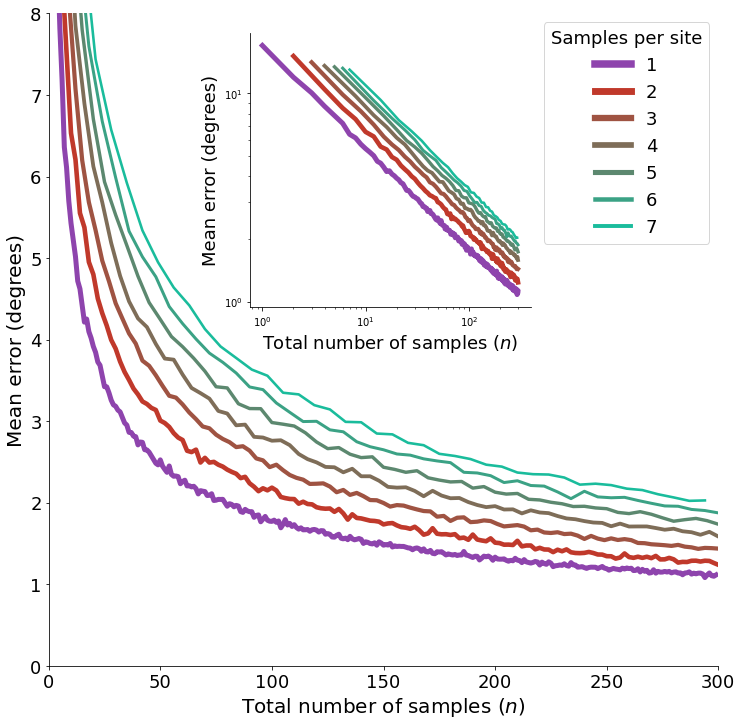

In [3]:
fig, ax = plt.subplots(figsize=(12,12))

palette = {1: '#8e44ad', 
           2: '#C0392B',
           3: '#9F5342', 
           4: '#7E6D58', 
           5: '#5C886F', 
           6: '#3BA285',
           7: '#1ABC9C' }

sizes = {i:5 - 0.4*(i-1) for i in range(1,8)}

sns.lineplot(ax=ax, data=df, x='n_tot', y='error_angle_mean', hue='k', size='k', palette=palette, sizes=sizes)
# plt.xscale("log")

plt.xlabel("Total number of samples ($n$)", fontsize=20)
plt.ylabel("Mean error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks([0, 50, 100, 150, 200, 250, 300], fontsize=18)
plt.xlim(0, 300)
plt.ylim(0, 8)
leg = plt.legend(title="Samples per site", loc="upper right", fontsize=18, title_fontsize=18)
for i in range(7):
    leg.get_lines()[i].set_linewidth(1.5*sizes[i+1])
ax.spines[['right', 'top']].set_visible(False)

axin = ax.inset_axes([0.30, 0.55, 0.42, 0.42])
sns.lineplot(ax=axin, data=df, x='n_tot', y='error_angle_mean', hue='k', size='k', palette=palette, sizes=sizes, legend=False)
axin.set_xscale("log")
axin.set_yscale("log")
axin.set_xlabel("Total number of samples ($n$)", fontsize=18)
axin.set_ylabel("Mean error (degrees)", fontsize=18)
axin.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure2a.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure2a.png", format="png", bbox_inches='tight')

## (b) Function of p

In [10]:
df = pd.read_csv('../../outputs/fig2b_5000sim_summary.csv')
df['outlier_rate'] = df['outlier_rate'].apply(lambda x: round(x, 2))
df = df.rename(columns={'outlier_rate': 'Outlier rate', 'n0': 'Samples per site'})
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,Samples per site,kappa_within_site,site_lat,site_long,Outlier rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,6.961978,6.488409,4.136269,9.261255,13.836567,3.716380,62.277862,5.420113,...,5,5,20,30.0,0.0,0.2,G,NaN,True,5000
1,1,0,3.791026,3.531298,2.277889,4.993698,7.494339,2.013242,18.424207,44.144837,...,155,1,20,30.0,0.0,0.3,G,NaN,False,5000
2,2,0,14.727711,13.691266,8.633307,19.532117,29.285867,7.975314,280.498400,NaN,...,1,5,20,30.0,0.0,0.0,G,NaN,True,5000
3,3,0,4.312370,3.972334,2.507251,5.767838,8.750726,2.369111,24.208094,4.677090,...,21,5,20,30.0,0.0,0.6,G,NaN,True,5000
4,4,0,62.616947,48.991792,22.157356,101.319496,146.726474,46.409750,6074.316193,NaN,...,1,1,20,30.0,0.0,0.6,G,NaN,False,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,0,4.943423,4.608345,2.933310,6.561474,9.732801,2.644652,31.430214,4.707596,...,14,5,20,30.0,0.0,0.5,G,NaN,True,5000
836,836,0,2.978835,2.798113,1.785733,3.957709,5.880434,1.595506,11.418589,35.624377,...,170,1,20,30.0,0.0,0.2,G,NaN,False,5000
837,837,0,3.022812,2.812697,1.808776,4.025882,5.949004,1.619803,11.760630,3.964830,...,44,5,20,30.0,0.0,0.6,G,NaN,True,5000
838,838,0,3.301272,3.058390,1.967244,4.396888,6.575474,1.765834,14.015940,4.089674,...,38,5,20,30.0,0.0,0.6,G,NaN,True,5000


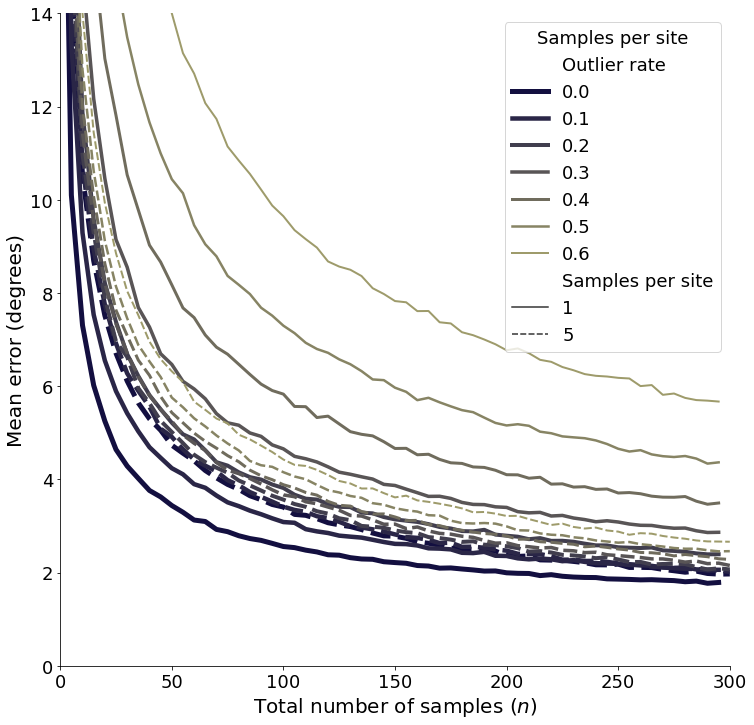

In [6]:
# df1 = df[df.k==1]

fig, ax = plt.subplots(figsize=(12,12))

palette = {0.0: '#130F40', 
           0.1: '#2A2647',
           0.2: '#413E4E', 
           0.3: '#595556', 
           0.4: '#706C5D', 
           0.5: '#878464', 
           0.6: '#9E9B6B'}

sizes = {x: 5*(1-x) for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

sns.lineplot(ax=ax, data=df, x='n_tot', y='error_angle_mean', style="Samples per site", hue='Outlier rate', size='Outlier rate', palette=palette, sizes=sizes)

plt.xlabel("Total number of samples ($n$)", fontsize=20)
plt.ylabel("Mean error (degrees)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks([0, 50, 100, 150, 200, 250, 300], fontsize=18)
plt.xlim(0, 300)
plt.ylim(0, 14)
plt.legend(title="Samples per site", loc="upper right", fontsize=18, title_fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

# plt.xscale('log')
# plt.yscale('log')

plt.savefig("Figure2b.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure2b.png", format="png", bbox_inches='tight')

In [4]:
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,6.961978,6.488409,4.136269,9.261255,13.836567,3.716380,62.277862,5.420113,...,5,5,20,30.0,0.0,0.2,G,NaN,True,5000
1,1,0,3.791026,3.531298,2.277889,4.993698,7.494339,2.013242,18.424207,44.144837,...,155,1,20,30.0,0.0,0.3,G,NaN,False,5000
2,2,0,14.727711,13.691266,8.633307,19.532117,29.285867,7.975314,280.498400,NaN,...,1,5,20,30.0,0.0,0.0,G,NaN,True,5000
3,3,0,4.312370,3.972334,2.507251,5.767838,8.750726,2.369111,24.208094,4.677090,...,21,5,20,30.0,0.0,0.6,G,NaN,True,5000
4,4,0,62.616947,48.991792,22.157356,101.319496,146.726474,46.409750,6074.316193,NaN,...,1,1,20,30.0,0.0,0.6,G,NaN,False,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,0,4.943423,4.608345,2.933310,6.561474,9.732801,2.644652,31.430214,4.707596,...,14,5,20,30.0,0.0,0.5,G,NaN,True,5000
836,836,0,2.978835,2.798113,1.785733,3.957709,5.880434,1.595506,11.418589,35.624377,...,170,1,20,30.0,0.0,0.2,G,NaN,False,5000
837,837,0,3.022812,2.812697,1.808776,4.025882,5.949004,1.619803,11.760630,3.964830,...,44,5,20,30.0,0.0,0.6,G,NaN,True,5000
838,838,0,3.301272,3.058390,1.967244,4.396888,6.575474,1.765834,14.015940,4.089674,...,38,5,20,30.0,0.0,0.6,G,NaN,True,5000
